In [4]:
# Importiamo le librerie

from os import listdir
from os.path import isfile, join
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import svm
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
import pickle

In [5]:
nome_file='Friday-23-02-2018_TrafficForML_CICFlowMeter'

In [6]:
with open('pickle/'+nome_file+'/scaled_document.pickle', 'rb') as handle:

    df = pickle.load(handle)

In [7]:
display(df)

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.012772,0.000172,0.000089,0.000745,1.259270e-05,0.098301,0.000000,0.059231,0.139603,0.243270,...,0.666667,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.979782,0.000034,0.000000,0.000948,0.000000e+00,0.075850,0.345066,0.276311,0.000000,0.000000,...,0.166667,0.000000,0.0,0.000000,0.000000,0.489925,0.331849,0.629902,0.349948,0
2,0.979782,0.000034,0.000000,0.000948,0.000000e+00,0.075850,0.345066,0.276311,0.000000,0.000000,...,0.166667,0.000000,0.0,0.000000,0.000000,0.489925,0.331849,0.629902,0.349948,0
3,0.014545,0.000172,0.000089,0.000745,1.259270e-05,0.098301,0.000000,0.059231,0.139603,0.243270,...,0.666667,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,0.745696,0.000086,0.000000,0.001896,0.000000e+00,0.075850,0.345066,0.276311,0.000000,0.000000,...,0.166667,0.035348,0.0,0.035348,0.035348,0.178102,0.213485,0.349938,0.060008,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,0.716604,0.000017,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.416667,0.000000,0.0,0.000000,0.000000,0.716654,0.000000,0.716654,0.716654,0
1048571,0.000001,0.000017,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.416667,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1048572,0.000659,0.000000,0.000008,0.000026,6.267571e-07,0.006220,0.028295,0.022658,0.000000,0.024427,...,0.166667,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1048573,0.083782,0.000172,0.000097,0.000835,1.061010e-05,0.102700,0.000000,0.066365,0.140223,0.292373,...,0.416667,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [8]:
df_prova = df.groupby(['Label'])['Label'].count()


df_prova=df_prova.to_frame()
print(df_prova)
df_prova.set_index('Label')
df_prova=df_prova.rename(columns={'Label':'Count'})

         Label
Label         
0      1042301
1          362
2          151
3           53


In [9]:
df_prova['test'] = np.random.randint(1, 10, df_prova.shape[0])

In [10]:
display(df_prova)

,Count,test
Label,,
0,1042301,8
1,362,3
2,151,6
3,53,3


In [11]:
lista_comb=pd.read_csv('top_feature/'+nome_file+'/combinazioni.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'top_feature/Friday-23-02-2018_TrafficForML_CICFlowMeter/combinazioni.csv'

(1048574, 2)


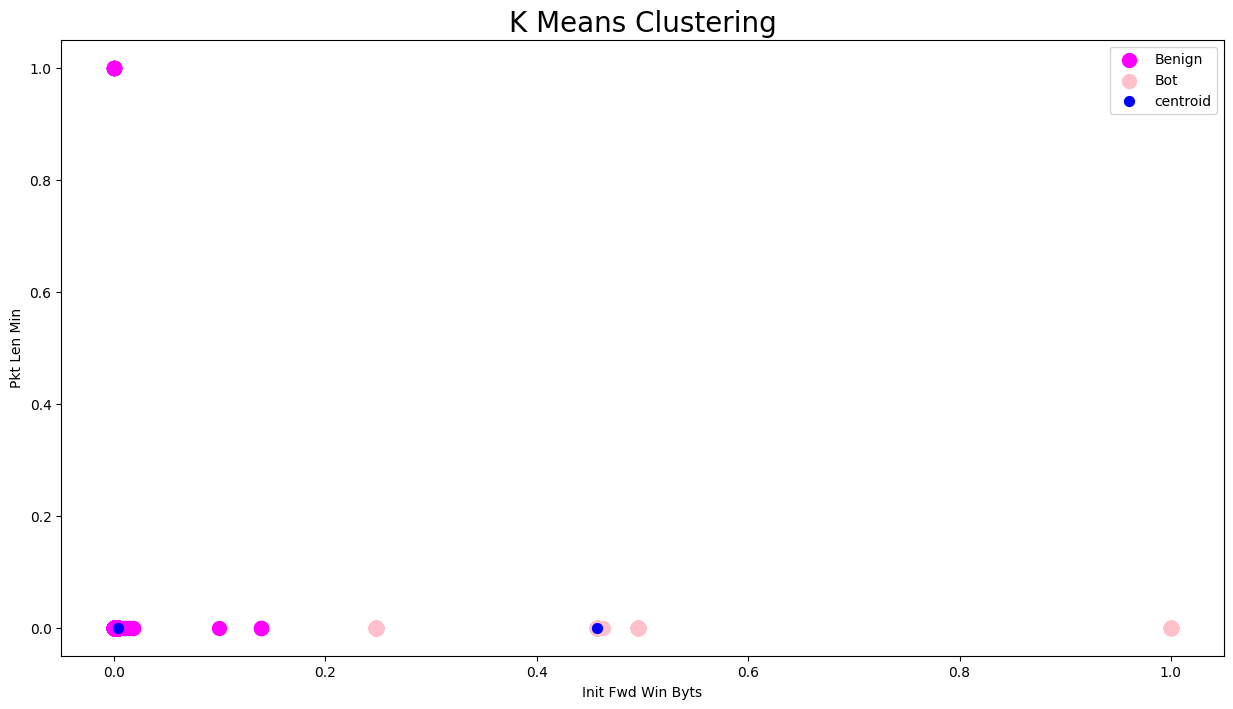

(1048574, 2)


<Figure size 640x480 with 0 Axes>

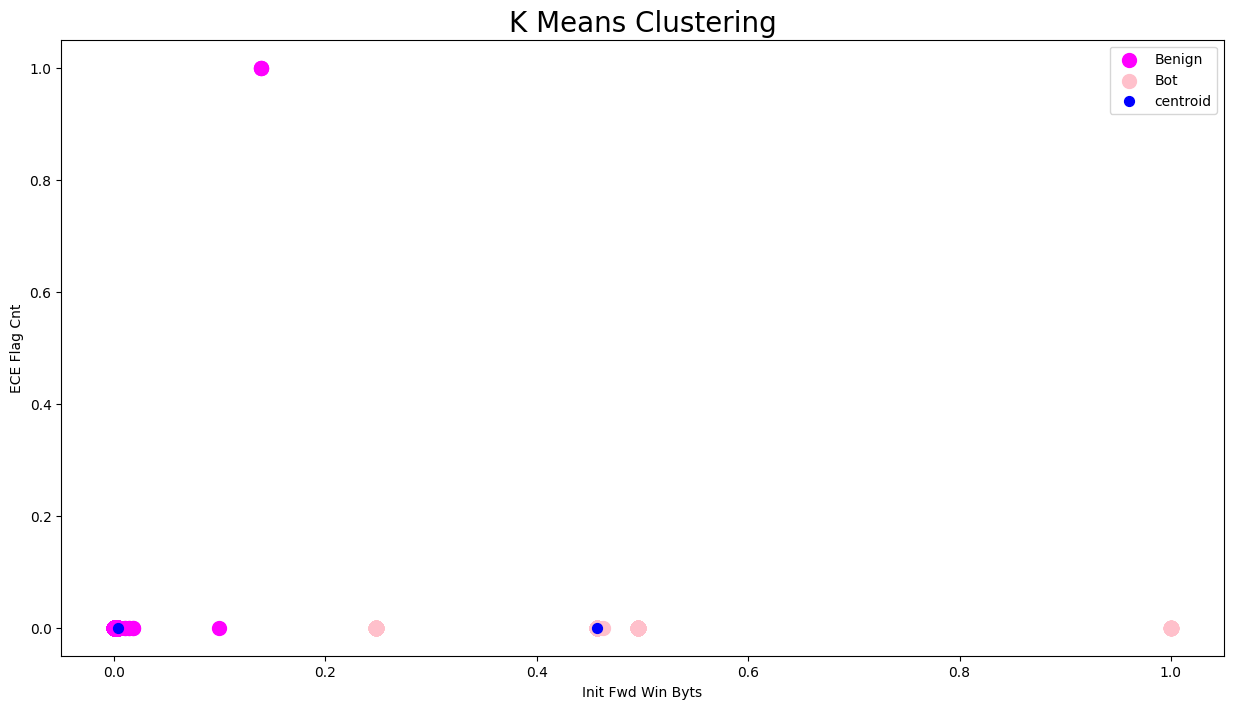

(1048574, 2)


<Figure size 640x480 with 0 Axes>

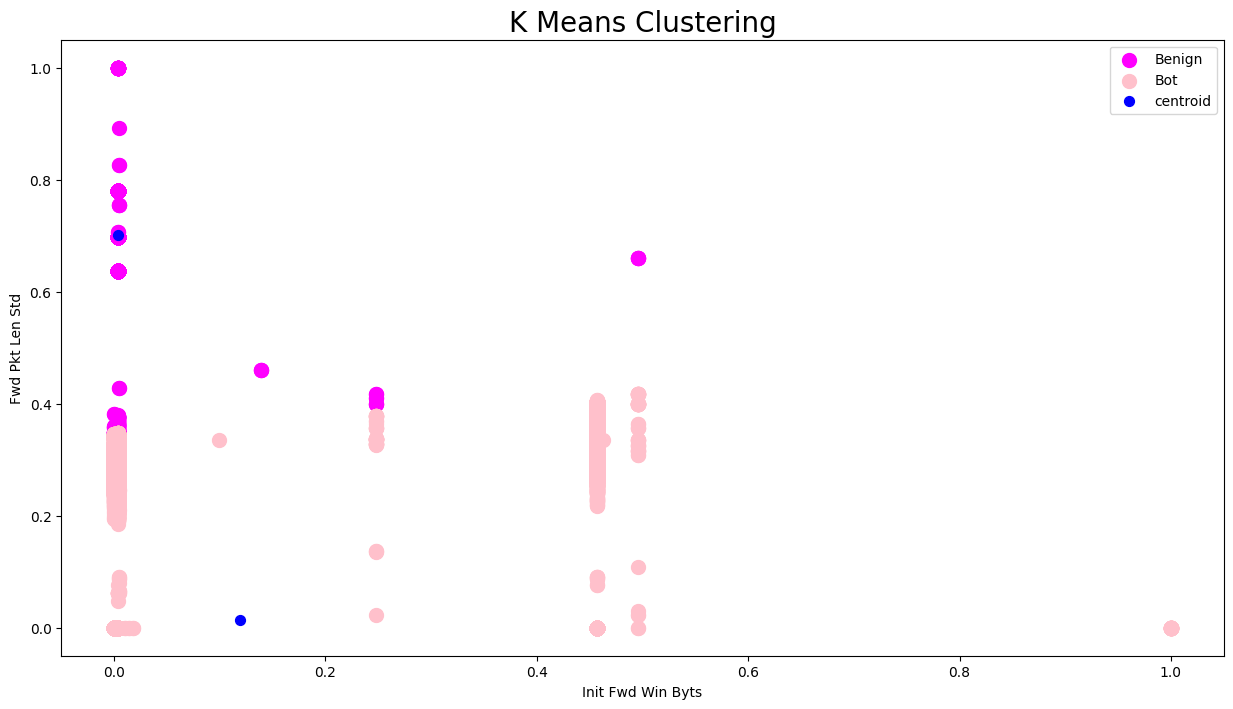

(1048574, 2)


<Figure size 640x480 with 0 Axes>

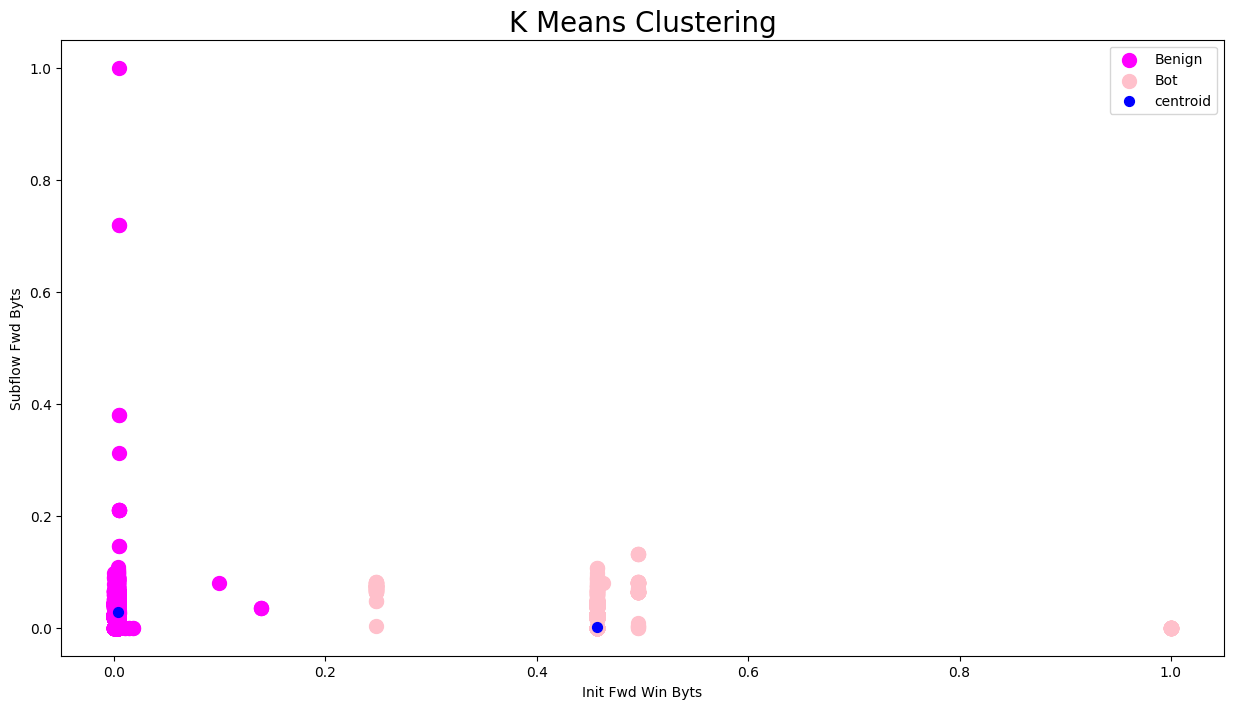

(1048574, 2)


<Figure size 640x480 with 0 Axes>

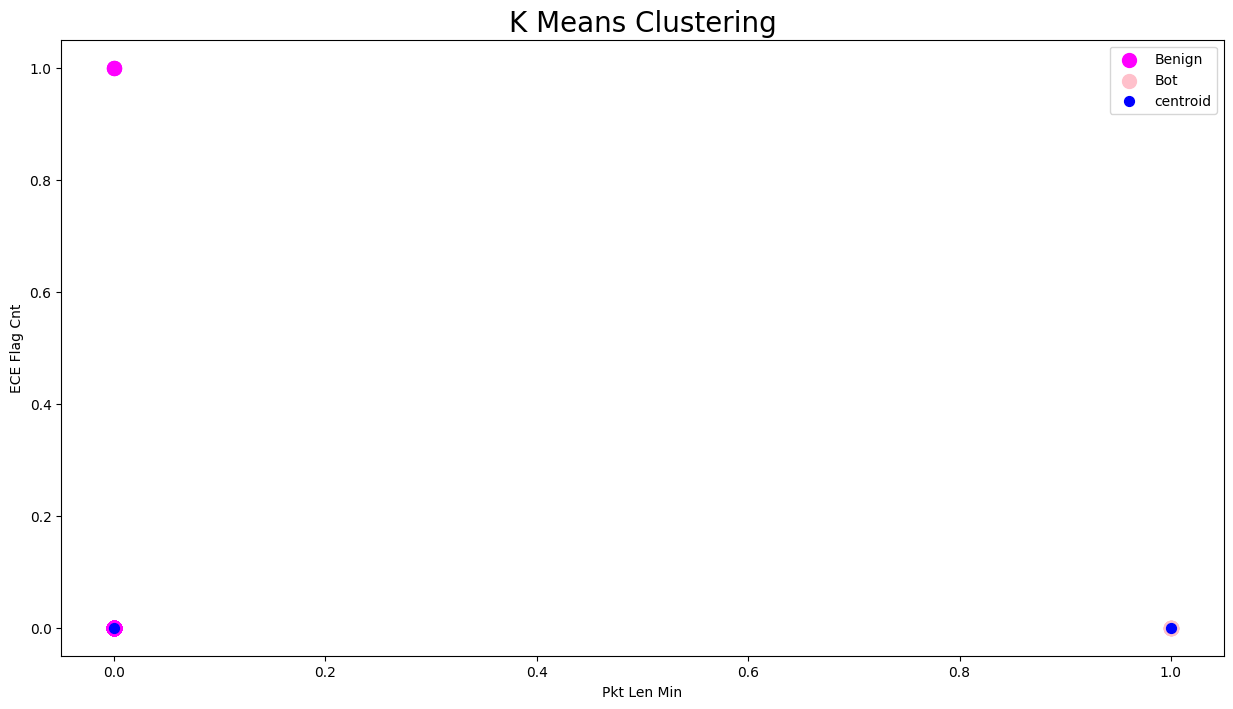

(1048574, 2)


<Figure size 640x480 with 0 Axes>

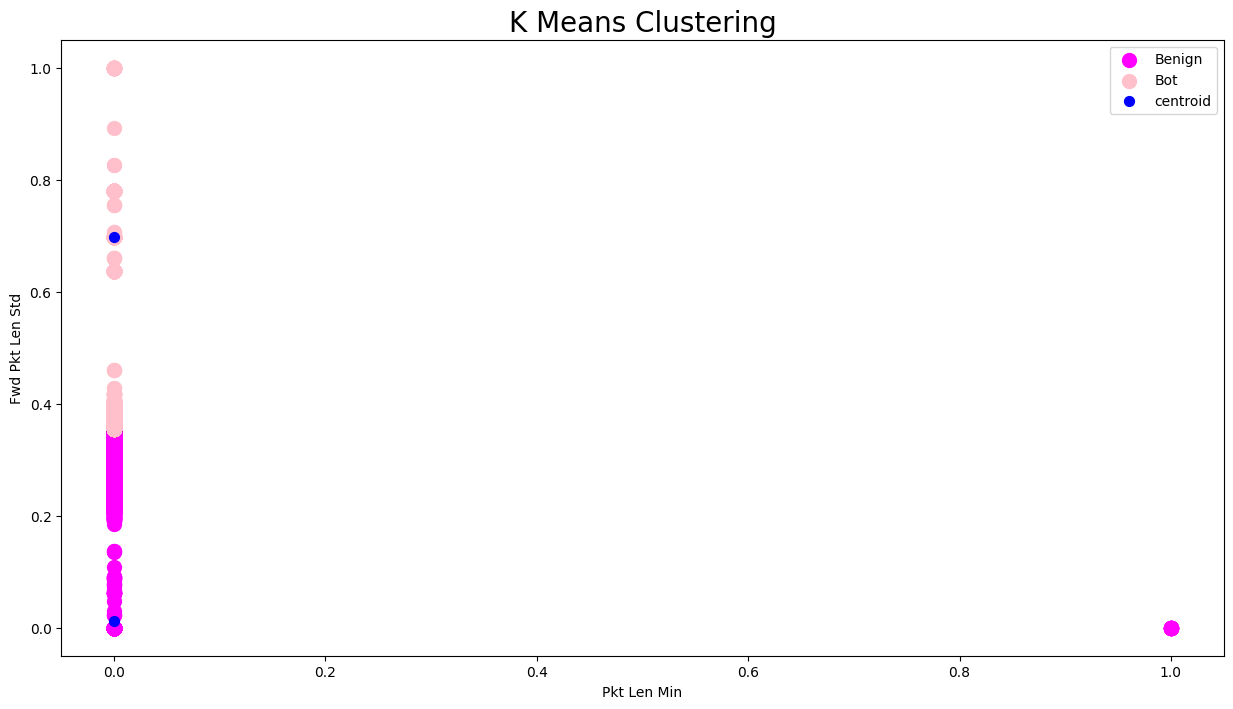

(1048574, 2)


<Figure size 640x480 with 0 Axes>

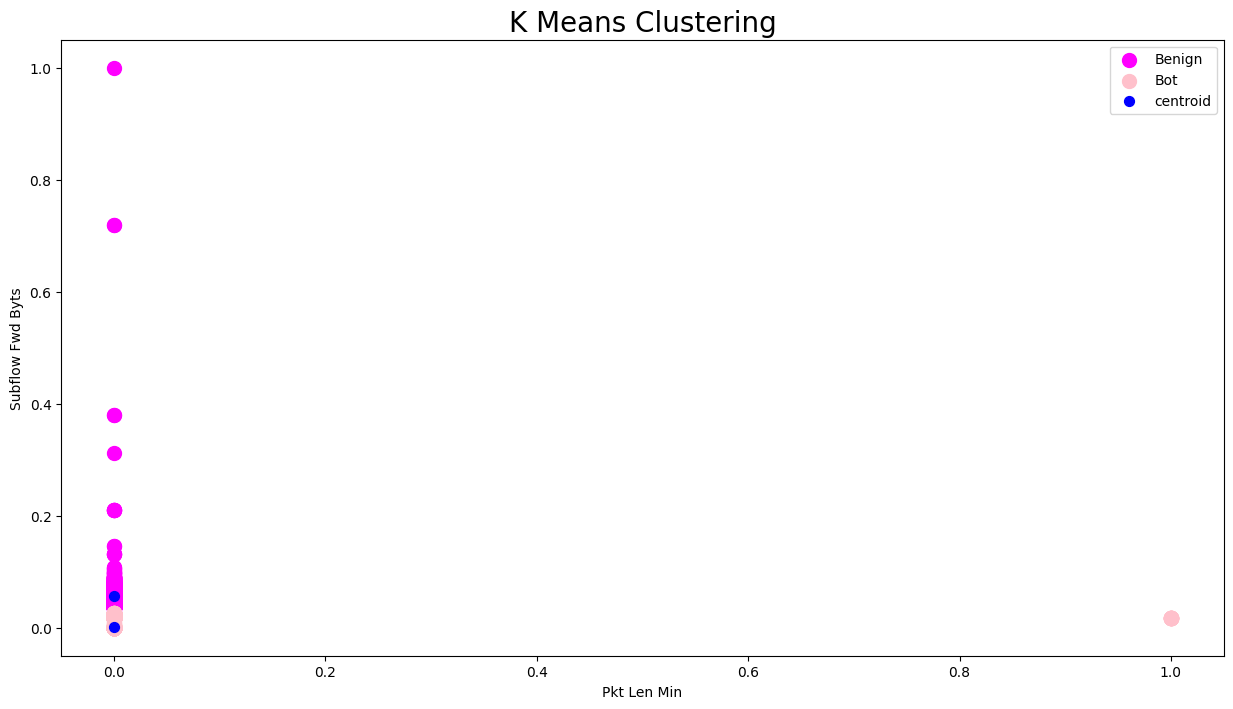

(1048574, 2)


<Figure size 640x480 with 0 Axes>

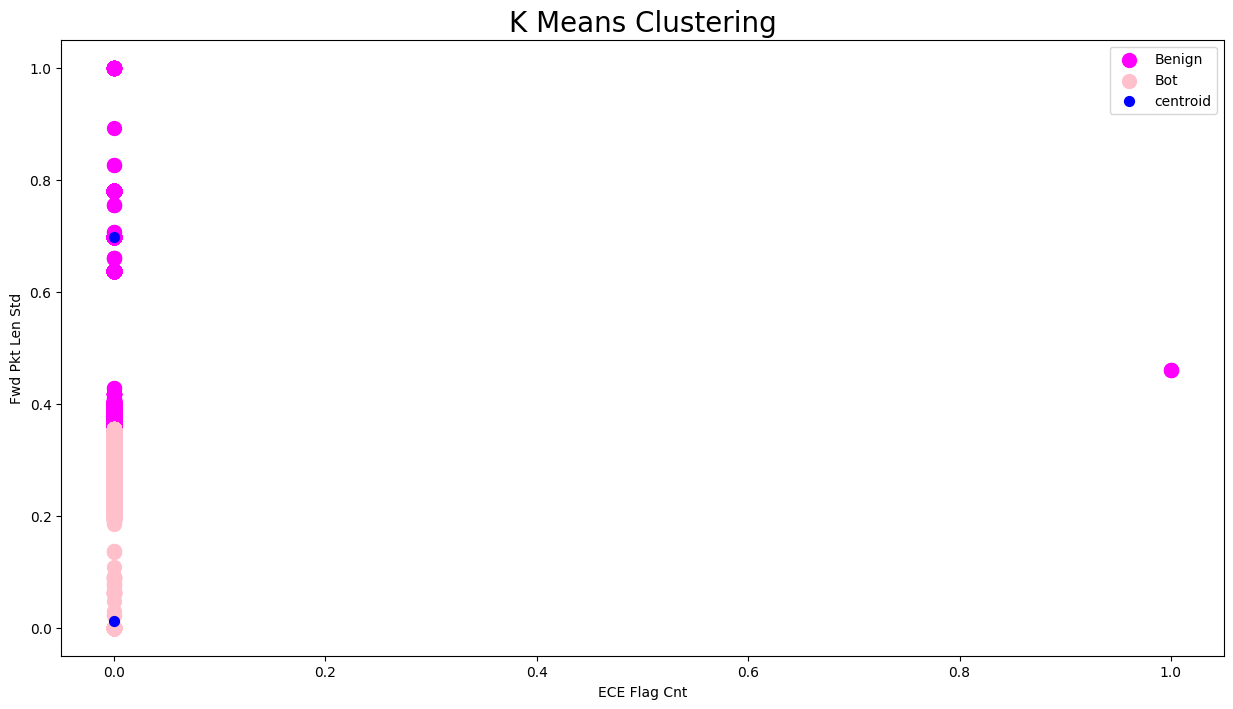

(1048574, 2)


<Figure size 640x480 with 0 Axes>

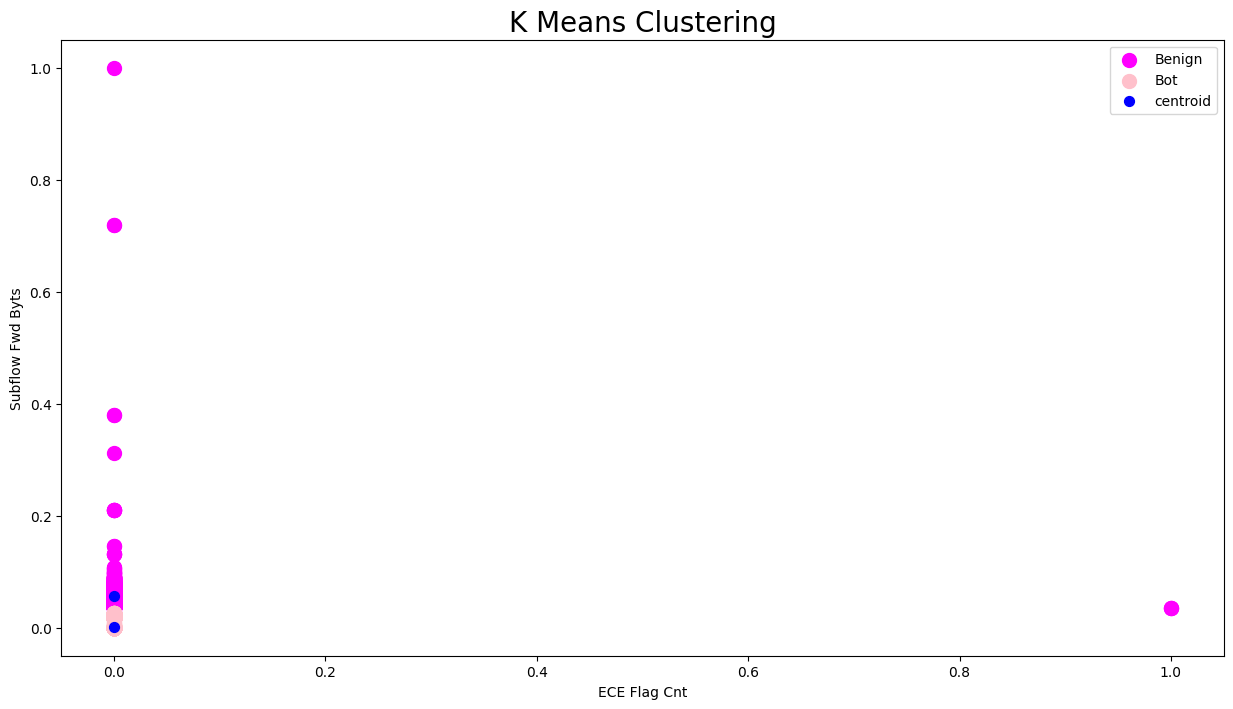

(1048574, 2)


<Figure size 640x480 with 0 Axes>

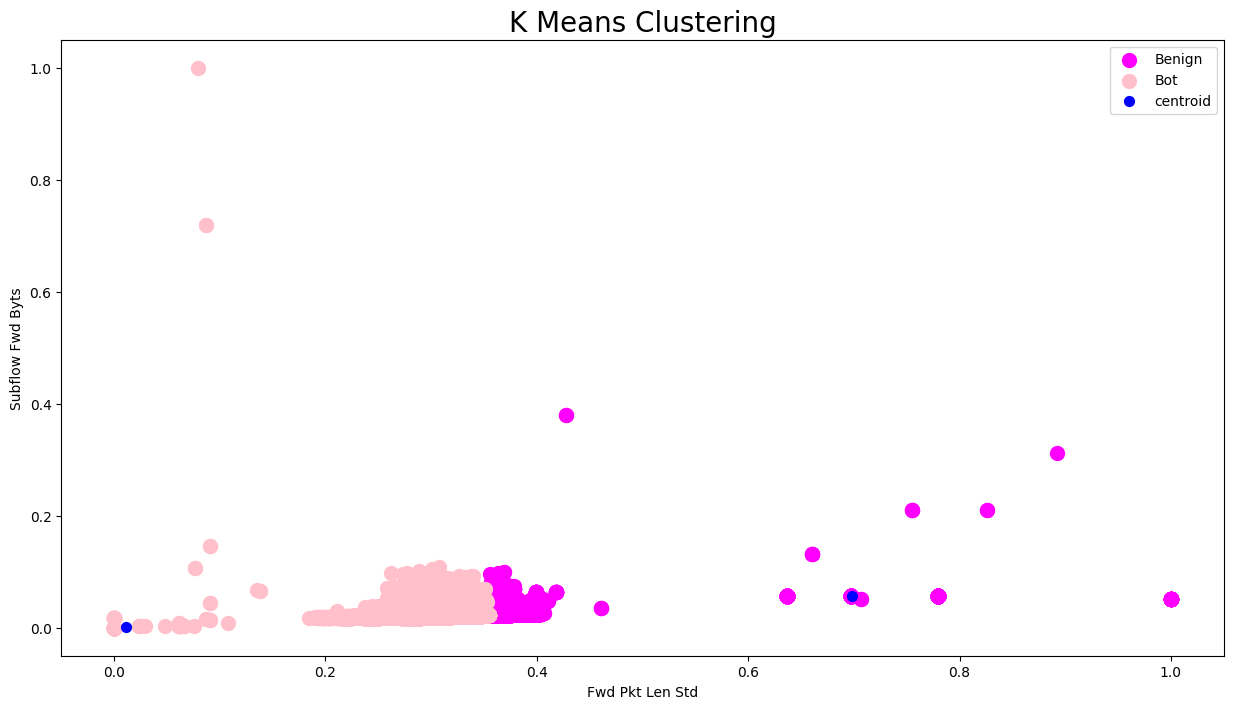

<Figure size 640x480 with 0 Axes>

In [ ]:
# take only annual income and spending score
from sklearn.cluster import KMeans
for index,row in lista_comb.iterrows():
    a = pd.DataFrame(data={row[0]:df[row[0]],row[1]:df[row[1]]})
    x = a.iloc[:, [0, 1]].values

    # let's check the shape of x
    print(x.shape)

    km = KMeans(n_clusters = 2, init = 'random', max_iter = 100, n_init = 5, random_state = 0)
    y_means = km.fit_predict(x)

    plt.figure(figsize=(15,8))
    plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'magenta', label = 'Benign')
    plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'pink', label = 'Bot')
    plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centroid')
    plt.title('K Means Clustering', fontsize = 20)
    plt.xlabel(row[0])
    plt.ylabel(row[1])
    plt.legend()
    title = str(row[0])+' - '+str(row[1])
    feature_name = title.replace('/','_')
    if not os.path.exists('image/'+nome_file+'/cluster_KMeans/'):
        os.makedirs('image/'+nome_file+'/cluster_KMeans/')
    plt.savefig('image/'+nome_file+'/cluster_KMeans/'+str(feature_name)+'.png')
    plt.show()

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import random

prova = df.values
neigh = NearestNeighbors(n_neighbors=5, n_jobs=4, algorithm='ball_tree', leaf_size=5)
nbrs = neigh.fit(prova)
distances, indices = nbrs.kneighbors(prova)

distances = np.sort(distances, axis=0)
plt.figure(figsize=(12,8))
plt.plot(distances[:,1])

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=1, min_samples=6).fit(prova)
ymeans = db.labels_
ymeans

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from minisom import MiniSom

# Genera dati di esempio
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, random_state=0)

# Definisci le dimensioni della mappa
map_width = 10
map_height = 10

# Inizializza la SOM
som = MiniSom(map_width, map_height, 2, sigma=1.0, learning_rate=0.5)

# Inizializza i pesi in modo casuale
som.random_weights_init(X)

# Addestra la SOM
som.train_batch(X, 1000)

# Trova il BMU (Best Matching Unit) per ogni campione di input
bmu_indexes = np.array([som.winner(x) for x in X])

# Stampa i BMU e i relativi vettori di peso
for i, (x, bmu) in enumerate(zip(X, bmu_indexes)):
    print(f"Campione {i+1}:")
    print("Input:", x)
    print("BMU Indice:", bmu)
    print("BMU Peso:", som.weights[bmu[0], bmu[1]])
    print()
